In [1]:
pip install diffusers transformers scipy accelerate

Note: you may need to restart the kernel to use updated packages.


In [4]:
with open('token.txt') as ifp:
    access_token = ifp.readline()
    print('Read a token of length {}'.format( len(access_token) ))

Read a token of length 37


In [5]:
import torch
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"

In [6]:
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, revision="fp16", use_auth_token=access_token, device_map="auto", cache_dir="stable_diffusion_cache")
pipe = pipe.to(device)

Fetching 16 files: 100%|███████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 804.67it/s]
/opt/conda/lib/python3.7/site-packages/transformers/models/clip/feature_extraction_clip.py:31: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  FutureWarning,


In [5]:
"""scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16, revision="fp16")
# pipe = pipe.to("cuda")"""

'scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")\npipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16, revision="fp16")\n# pipe = pipe.to("cuda")'

In [6]:
generator = torch.Generator("cuda").manual_seed(1024)

100%|███████████████████████████████████████████████████████████████████████████████████| 50/50 [00:31<00:00,  1.57it/s]


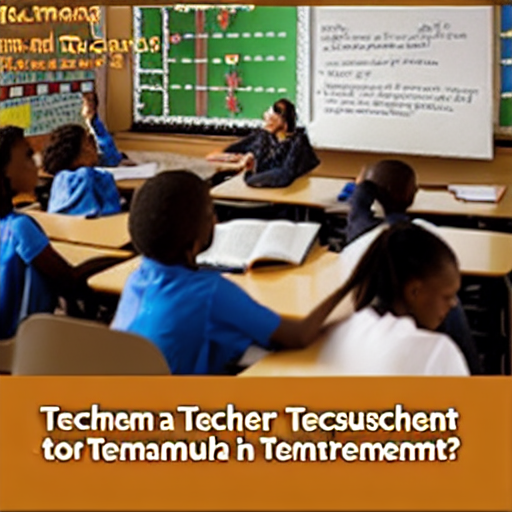

CPU times: user 19.3 s, sys: 13.6 s, total: 32.9 s
Wall time: 32.7 s


In [12]:
%%time
prompt = "a photograph about the topic: Should teachers get tenure?"
image = pipe(prompt, guidance_scale=20, num_inference_steps=50).images[0]

path = "image_results/"
image_name = "topic_generated"

image.save(path + image_name + ".png")

from PIL import Image

image = Image.open(path + image_name + ".png")
image.show()

In [35]:
"""path = "image_results/"
image_name = "topic_generated"

image.save(path + image_name + ".png")"""

In [ ]:
"""from PIL import Image

image = Image.open(path + image_name + ".png")
image.show()"""

In [7]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [8]:
%%time
num_images = 3
prompt = ["a photograph about the topic: Should abortion be legal?"] * num_images

images = pipe(prompt, guidance_scale=7.5, num_inference_steps=50).images

grid = image_grid(images, rows=1, cols=3)

100%|███████████████████████████████████████████████████████████████████████████████████| 50/50 [01:12<00:00,  1.44s/it]


CPU times: user 40.8 s, sys: 33.2 s, total: 1min 14s
Wall time: 1min 14s


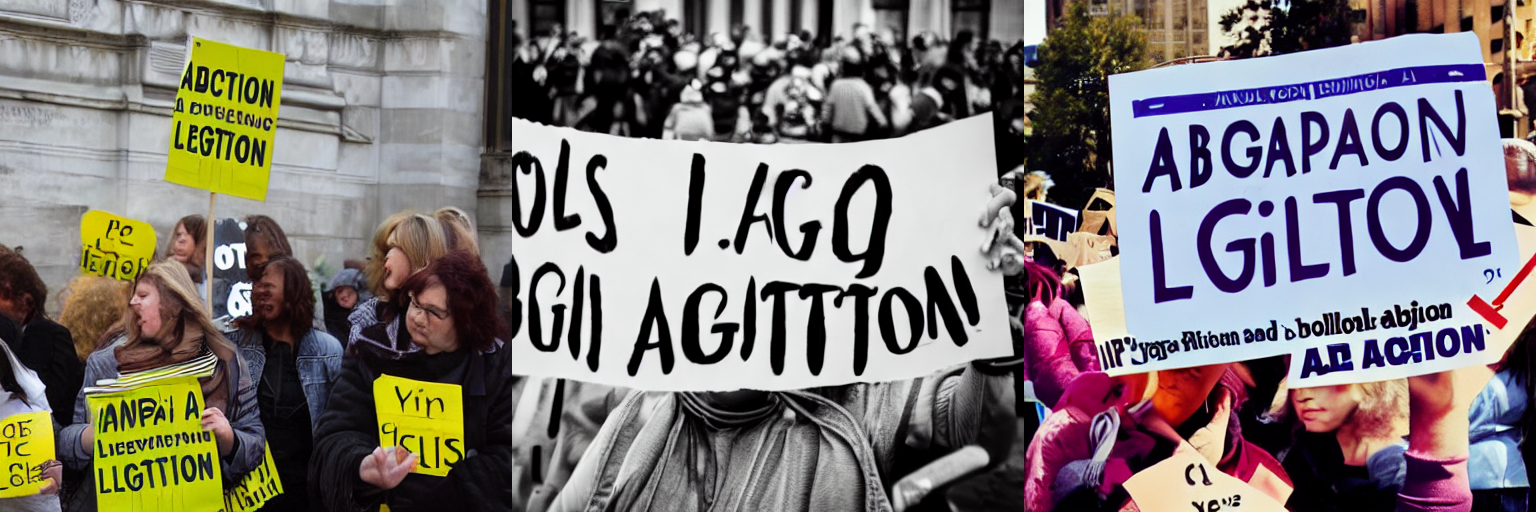

In [9]:
path = "image_results/"
image_name = "topic_generated"

grid.save(path + image_name + ".png")

from PIL import Image

image = Image.open(path + image_name + ".png")
image.show()